<a href="https://colab.research.google.com/github/aljurtechodes/aljurITBAN3/blob/main/LabAcitivty2_Lacbayo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing packages/libararies/modules

In [ ]:
import os
import numpy as np
import pandas as pd

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
from matplotlib import pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

2. Import and load the dataset. Setting the client_id as the index.

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/ITBAN 3 - Colab Notebooks/loans.csv', index_col = 'client_id')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# displaying the contents of the dataset by showing the first 5 rows.
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


4. Check the info of the dataset and the datatypes for each columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


In [ ]:
df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

5. Determining whether the dataset has missing values

In [ ]:
df.isnull().sum()

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

As observed, there is no missing values in each of the columns in the dataset,

6. Checking the possible outliers usig Boxplot

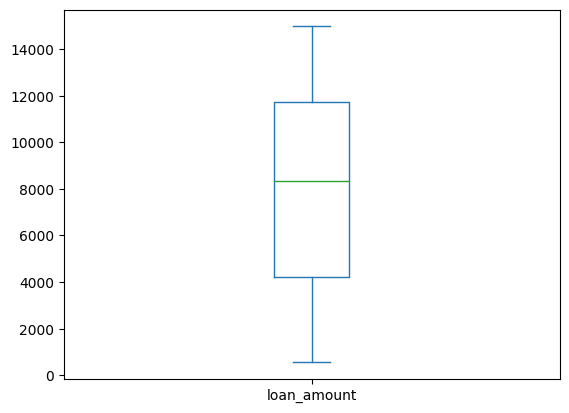

In [ ]:
df['loan_amount'].plot(kind='box')
plt.show()

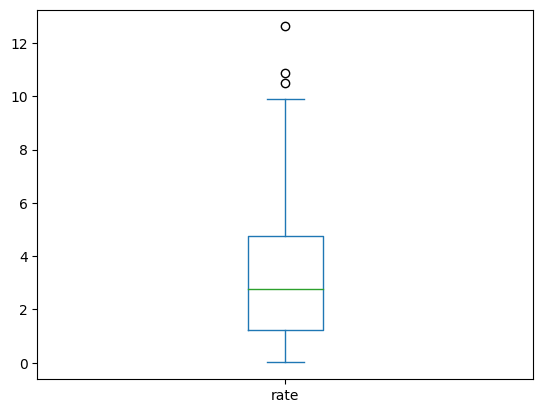

In [ ]:
df['rate'].plot(kind='box')
plt.show()

Based on the results, upon checking the outliers through box plot, there is no outliers in the 'loan_amount' column. However, in the 'rate' column, there are three outliers (outside the upper and lower whiskers of the boxplot.

7-a. Treating the outliers in the 'rate' column using SQRT transformation

In [ ]:
df['Sqrt_Rate'] = df['rate'] ** 0.5

In [ ]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Sqrt_Rate
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181


7-b. Treating the outliers using the capping approach: Z-score

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/ITBAN 3 - Colab Notebooks/loans.csv', index_col = 'client_id')

In [ ]:
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


Converting the datatypes for columns

In [ ]:
df1['loan_id'] = df1['loan_id'].astype('object')

df1['repaid'] = df1['repaid'].astype('category')

In [ ]:
df1['loan_start'] = pd.to_datetime(df1['loan_start'], format = '%Y-%m-%d')

df1['loan_end'] = pd.to_datetime(df1['loan_end'], format = '%Y-%m-%d')

Importing SciPy Library in calculating the Z-score

In [ ]:
import scipy.stats as stat

In [ ]:
df1['Z-Score'] = stat.zscore(df1['rate'])

In [ ]:
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z-Score
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


Combining lower and upper limit

In [ ]:
df1[(df1['Z-Score'] < -3) | (df1['Z-Score'] >3)]

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z-Score
client_id,,,,,,,,
41480,credit,2947,1,10302,2005-11-10,2008-03-16,10.49,3.037362
48177,other,6318,0,10224,2003-02-02,2005-05-08,10.89,3.204415
49624,home,8133,1,10312,2009-03-14,2011-03-21,12.62,3.926916


Check the number of outliers

In [ ]:
df1[(df1['Z-Score'] < -3) | (df1['Z-Score'] > 3)].shape[0]

3

In [ ]:
df2 = df1[(df1['Z-Score'] > -3) & (df1['Z-Score'] < 3)].reset_index()
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z-Score
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [ ]:
df1.shape

(443, 8)

In [ ]:
df2.shape

(440, 9)

In [ ]:
df3 = df2.copy()

In [ ]:
df3.drop(columns = ['Z-Score'], inplace=True)
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


8. Applying scaling using min-max normalization (for loan amount)

In [ ]:
min_LoanAmount = df3.loan_amount.min()
min_LoanAmount

559

In [ ]:
max_LoanAmount = df3.loan_amount.max()
max_LoanAmount

14971

In [ ]:
df3['Min_Max_LoanAmount'] = (df3['loan_amount'] - min_LoanAmount) / (max_LoanAmount - min_LoanAmount)

Displaying the skewness and kurtosis graphs for Loan Amount

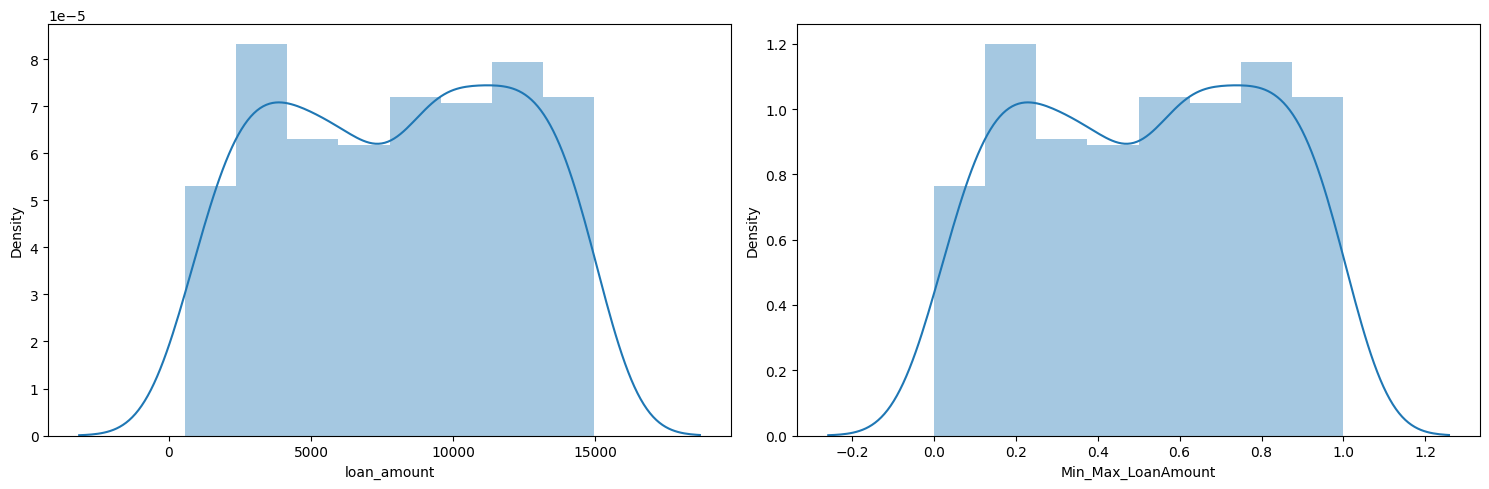

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
sns.distplot(df3['loan_amount'], ax=axes[0])
sns.distplot(df3['Min_Max_LoanAmount'], ax=axes[1])
plt.tight_layout()
plt.show()

From the results, the skewness value for the original data and the skewness value for the Min-Max scale are just the same. As well as for the kurtosis, the value for the original data and the value for the Min-Max scale are just the same as illustrated in the graphs.

9. Apply encoding of categorical values into dummy variables using pd.get_dummies approach.

In [ ]:
df_loans = df2.copy()
df_loans.drop(columns = ['Z-Score'], inplace = True)
df_loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [ ]:
df_loans.dtypes

client_id               int64
loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [ ]:
df_loans.repaid.head()

0    0
1    0
2    1
3    1
4    1
Name: repaid, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
dummy_cat = pd.get_dummies(df_loans['loan_type'], drop_first = True)
dummy_cat.head()

,credit,home,other
0,0,1,0
1,1,0,0
2,0,1,0
3,0,0,0
4,1,0,0


10. Creating new derived features to calculate the tenure of the loan by using loan_start and loan_end

In [ ]:
import datetime as dt

In [ ]:
df_loans['loan_tenure'] = df_loans['loan_end'] - df_loans['loan_start']

In [ ]:
df_loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_tenure
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,613 days
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,635 days
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,519 days
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,879 days
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,684 days


In [ ]:
df_loans.dtypes

client_id                int64
loan_type               object
loan_amount              int64
repaid                category
loan_id                 object
loan_start      datetime64[ns]
loan_end        datetime64[ns]
rate                   float64
loan_tenure    timedelta64[ns]
dtype: object

In [ ]:
df_loans['loan_tenure'] = df_loans['loan_tenure'].dt.days

In [ ]:
df_loans['loan_tenure']

0      613
1      635
2      519
3      879
4      684
      ... 
435    928
436    511
437    948
438    633
439    638
Name: loan_tenure, Length: 440, dtype: int64

In [ ]:
df_loans['loan_tenure'] = df_loans['loan_tenure']/365
df_loans['loan_tenure']

0      1.679452
1      1.739726
2      1.421918
3      2.408219
4      1.873973
         ...   
435    2.542466
436    1.400000
437    2.597260
438    1.734247
439    1.747945
Name: loan_tenure, Length: 440, dtype: float64

11. Splitting the data into training and test sets with 80-20 division

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Y = df_loans['loan_amount']
X = df_loans.drop('loan_amount', axis=1)

In [ ]:
X.head()

,client_id,loan_type,repaid,loan_id,loan_start,loan_end,rate,loan_tenure
0,46109,home,0,10243,2002-04-16,2003-12-20,2.15,1.679452
1,46109,credit,0,10984,2003-10-21,2005-07-17,1.25,1.739726
2,46109,home,1,10990,2006-02-01,2007-07-05,0.68,1.421918
3,46109,cash,1,10596,2010-12-08,2013-05-05,1.24,2.408219
4,46109,credit,1,11415,2010-07-07,2012-05-21,3.13,1.873973


In [ ]:
Y.head()

0    13672
1     9794
2    12734
3    12518
4    14049
Name: loan_amount, dtype: int64

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, train_size = 0.8, random_state = 0)

Checking the dimesions of the train & test subset

In [ ]:
print("The Shape of X_Train:", X_Train.shape)
print("The Shape of X_Test", X_Test.shape)
print('')
print("The Shape of Y_Train:", Y_Train.shape)
print("The Shape of Y_Test:", Y_Test.shape)

The Shape of X_Train: (352, 8)
The Shape of X_Test (88, 8)

The Shape of Y_Train: (352,)
The Shape of Y_Test: (88,)


In [ ]:
median_Y_Train = Y_Train.median()
median_Y_Test = Y_Test.median()

In [ ]:
print("Median for Y_Train variables:", median_Y_Train)
print('')
print("Median for Y_Test variables:", median_Y_Test)

Median for Y_Train variables: 8412.5

Median for Y_Test variables: 7673.0
